In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    auc
)
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import xgboost as xgb


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/CS 441/Final Project/data/creditcard.csv'
df = pd.read_csv(file_path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
X = df.drop(columns=['Class'])
y = df['Class']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


   param_C param_penalty  mean_test_score
0     0.01            l1         0.062894
1     0.01            l2         0.062775
2     0.10            l1         0.061777
3     0.10            l2         0.061834
4     1.00            l1         0.061174
5     1.00            l2         0.061172
6    10.00            l1         0.061103
7    10.00            l2         0.061134


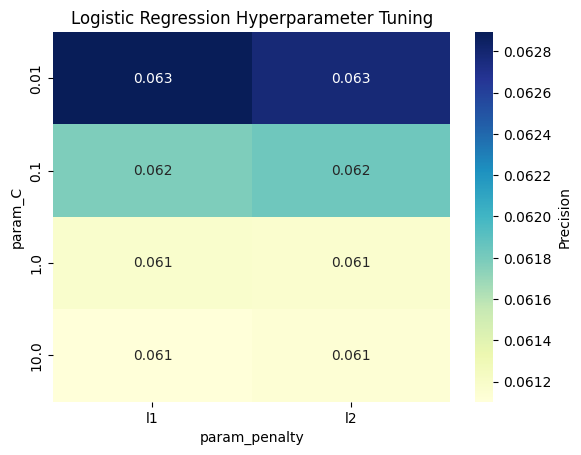

In [6]:
logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
logreg_params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_logreg = GridSearchCV(logreg, logreg_params, scoring='precision', cv=3)
grid_logreg.fit(X_train, y_train)

results_logreg = pd.DataFrame(grid_logreg.cv_results_)
results_logreg = results_logreg[['param_C', 'param_penalty', 'mean_test_score']]

print(results_logreg)

pivot_logreg = results_logreg.pivot(index='param_C', columns='param_penalty', values='mean_test_score')
sns.heatmap(pivot_logreg, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Precision'})
plt.title('Logistic Regression Hyperparameter Tuning')
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


   param_n_neighbors param_weights  mean_test_score
0                  3       uniform         0.918193
1                  3      distance         0.912733
2                  5       uniform         0.913526
3                  5      distance         0.922927
4                  7       uniform         0.901899
5                  7      distance         0.912252
6                 10       uniform         0.896233
7                 10      distance         0.906157


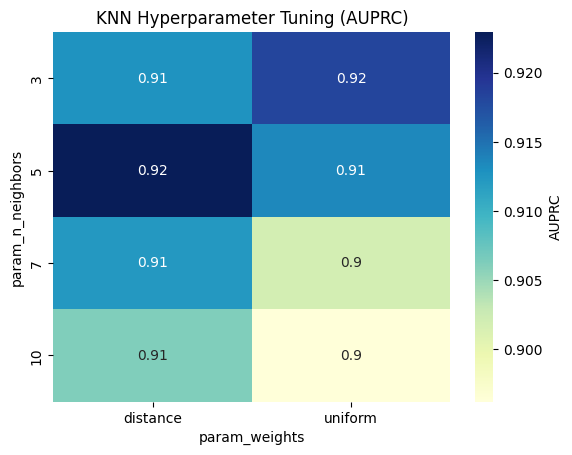

In [7]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn, knn_params, scoring='precision', cv=3)
grid_knn.fit(X_train, y_train)

results_knn = pd.DataFrame(grid_knn.cv_results_)
results_knn = results_knn[['param_n_neighbors', 'param_weights', 'mean_test_score']]

print(results_knn)

pivot_knn = results_knn.pivot(index='param_n_neighbors', columns='param_weights', values='mean_test_score')
sns.heatmap(pivot_knn, annot=True, cmap="YlGnBu", cbar_kws={'label': 'AUPRC'})
plt.title('KNN Hyperparameter Tuning (AUPRC)')
plt.show()


    param_learning_rate  param_n_estimators  param_max_depth  mean_test_score
0                  0.01                 100                3         0.898894
1                  0.01                 200                3         0.874016
2                  0.01                 300                3         0.867724
3                  0.01                 100                6         0.952784
4                  0.01                 200                6         0.940028
5                  0.01                 300                6         0.934499
6                  0.01                 100               10         0.952641
7                  0.01                 200               10         0.945246
8                  0.01                 300               10         0.934407
9                  0.10                 100                3         0.906912
10                 0.10                 200                3         0.921580
11                 0.10                 300                3    

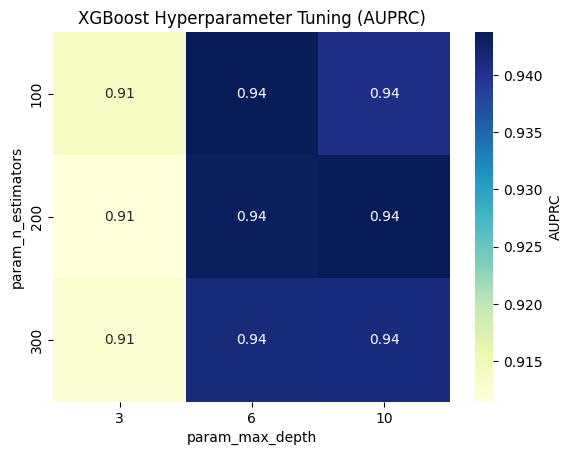

In [8]:
xgb_model = xgb.XGBClassifier()
xgb_params = {'learning_rate': [0.01, 0.1, 0.3], 'n_estimators': [100, 200, 300], 'max_depth': [3, 6, 10]}
grid_xgb = GridSearchCV(xgb_model, xgb_params, scoring='precision', cv=3)
grid_xgb.fit(X_train, y_train)

results_xgb = pd.DataFrame(grid_xgb.cv_results_)
results_xgb = results_xgb[['param_learning_rate', 'param_n_estimators', 'param_max_depth', 'mean_test_score']]

print(results_xgb)

pivot_xgb = results_xgb.pivot_table(
    index='param_n_estimators',
    columns='param_max_depth',
    values='mean_test_score',
    aggfunc='mean'
)
sns.heatmap(pivot_xgb, annot=True, cmap="YlGnBu", cbar_kws={'label': 'AUPRC'})
plt.title('XGBoost Hyperparameter Tuning (AUPRC)')
plt.show()


In [9]:
def calculate_auc_pr(y_true, y_pred_probs):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
    return auc(recall, precision)

models = {
    'Logistic Regression': grid_logreg.best_estimator_,
    'KNN': grid_knn.best_estimator_,
    'XGBoost': grid_xgb.best_estimator_
}

metrics = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_probs = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_pr = calculate_auc_pr(y_test, y_pred_probs)

    metrics.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-PR': auc_pr
    })

metrics_df = pd.DataFrame(metrics)

print(metrics_df)


                 Model  Precision    Recall  F1-Score    AUC-PR
0  Logistic Regression   0.067529  0.959184  0.126174  0.791156
1                  KNN   0.909091  0.816327  0.860215  0.898156
2              XGBoost   0.926829  0.775510  0.844444  0.886252


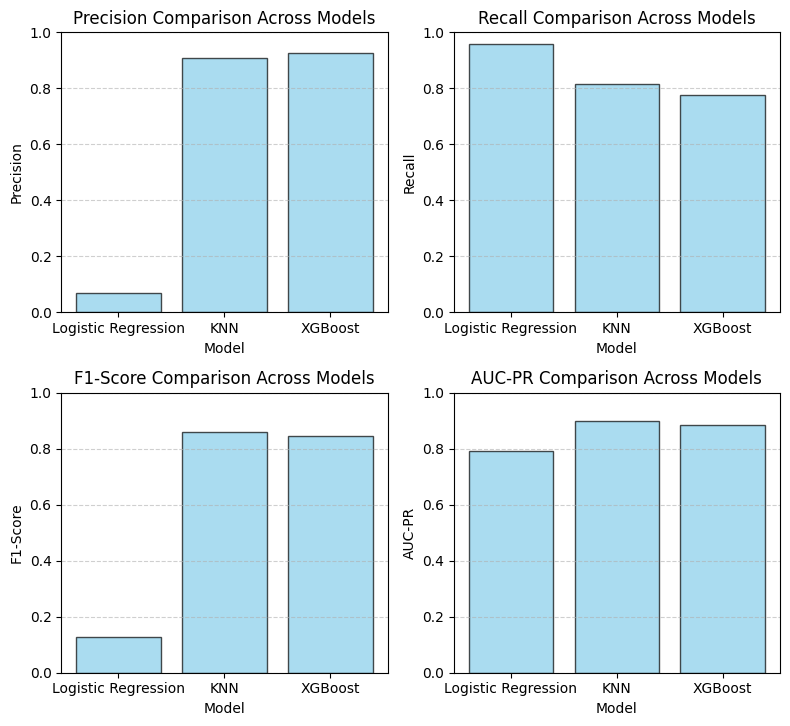

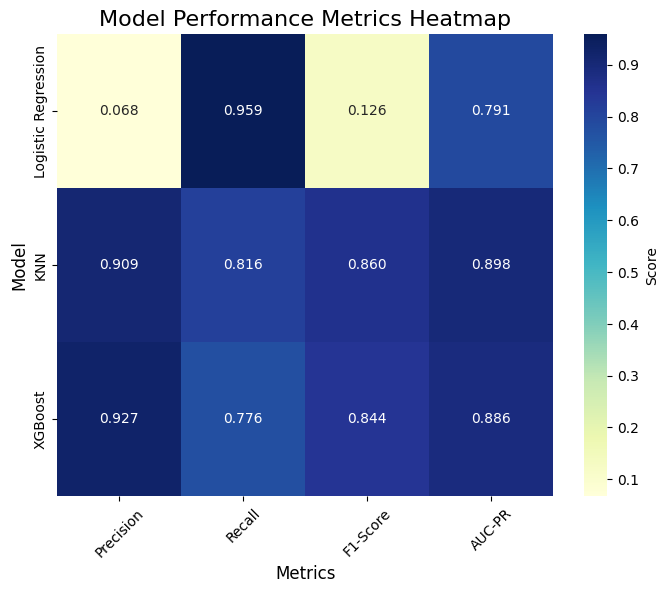

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

metrics = ["Precision", "Recall", "F1-Score", "AUC-PR"]
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    ax.bar(metrics_df["Model"], metrics_df[metric], alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f"{metric} Comparison Across Models", fontsize=12)
    ax.set_ylabel(metric, fontsize=10)
    ax.set_xlabel("Model", fontsize=10)
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(metrics_df.set_index("Model"), annot=True, cmap="YlGnBu", cbar_kws={'label': 'Score'}, fmt=".3f", ax=ax)
ax.set_title("Model Performance Metrics Heatmap", fontsize=16)
ax.set_ylabel("Model", fontsize=12)
ax.set_xlabel("Metrics", fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [ ]:
X_train_combined = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)])
y_train_combined = pd.concat([pd.Series(y_train), pd.Series(y_val)])

xgb_best = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=300,
    max_depth=10,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_best.fit(X_train_combined, y_train_combined)

y_test_pred = xgb_best.predict(X_test)
y_test_pred_probs = xgb_best.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_test_pred_probs)
auc_pr = auc(recall_vals, precision_vals)

print("Test Performance:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"AUC-PR: {auc_pr:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:16:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Performance:
Precision: 0.913
Recall: 0.857
F1-Score: 0.884
AUC-PR: 0.898

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.91      0.86      0.88        49

    accuracy                           1.00     28481
   macro avg       0.96      0.93      0.94     28481
weighted avg       1.00      1.00      1.00     28481



## q3

In [6]:
from sklearn.ensemble import IsolationForest

df['hour'] = pd.to_datetime(df['Time'], unit='s').dt.hour
df['day_of_week'] = pd.to_datetime(df['Time'], unit='s').dt.dayofweek

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X_scaled)

df['amount_anomaly_interaction'] = df['Amount'] * df['anomaly_score']

X = df.drop(columns=['Class', 'Time', 'Amount'])
y = df['Class']


In [7]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

input_dim = X_scaled.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.fit(X_scaled, X_scaled, epochs=20, batch_size=64, shuffle=True, validation_split=0.2)

encoder_model = Model(inputs=input_layer, outputs=encoder)
X_latent = encoder_model.predict(X_scaled)

X_enriched = np.hstack((X_scaled, X_latent))


Epoch 1/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.9692 - val_loss: 0.7987
Epoch 2/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8263 - val_loss: 0.7741
Epoch 3/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.8055 - val_loss: 0.7614
Epoch 4/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8030 - val_loss: 0.7529
Epoch 5/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7916 - val_loss: 0.7498
Epoch 6/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8059 - val_loss: 0.7464
Epoch 7/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8069 - val_loss: 0.7444
Epoch 8/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.7868 - val_loss: 0.7420
Epoch 9/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.7817 - val_loss: 0.7404
Epoch 10/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7720 - val_loss: 0.7395
Epoch 11/20
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7834 - val_loss: 0.7392
Epoch 12/20
3561/3561 ━━━━━━━

In [8]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_enriched, y, test_size=0.2, stratify=y, random_state=42)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
xgb_clf = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=10, use_label_encoder=False, eval_metric='logloss')
mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)

stacked_ensemble = StackingClassifier(
    estimators=[
        ('lr', log_reg),
        ('xgb', xgb_clf),
        ('mlp', mlp_clf)
    ],
    final_estimator=LogisticRegression()
)

stacked_ensemble.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:15:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:20:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:20:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:20:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

StackingClassifier(estimators=[('lr',
                                LogisticRegression(class_weight='balanced',
                                                   max_iter=1000)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_p...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('mlp',
                                MLPClassifier(hidden_layer_sizes=(64, 32),
                                              max_iter=1000))],
                   final_estimator=LogisticRegression())

In [9]:
from sklearn.metrics import classification_report, precision_recall_curve, auc, precision_score, recall_score, f1_score

y_pred = stacked_ensemble.predict(X_test)
y_pred_probs = stacked_ensemble.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_probs)
auc_pr = auc(recall_vals, precision_vals)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"AUC-PR: {auc_pr:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Precision: 0.911
Recall: 0.837
F1-Score: 0.872
AUC-PR: 0.878

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



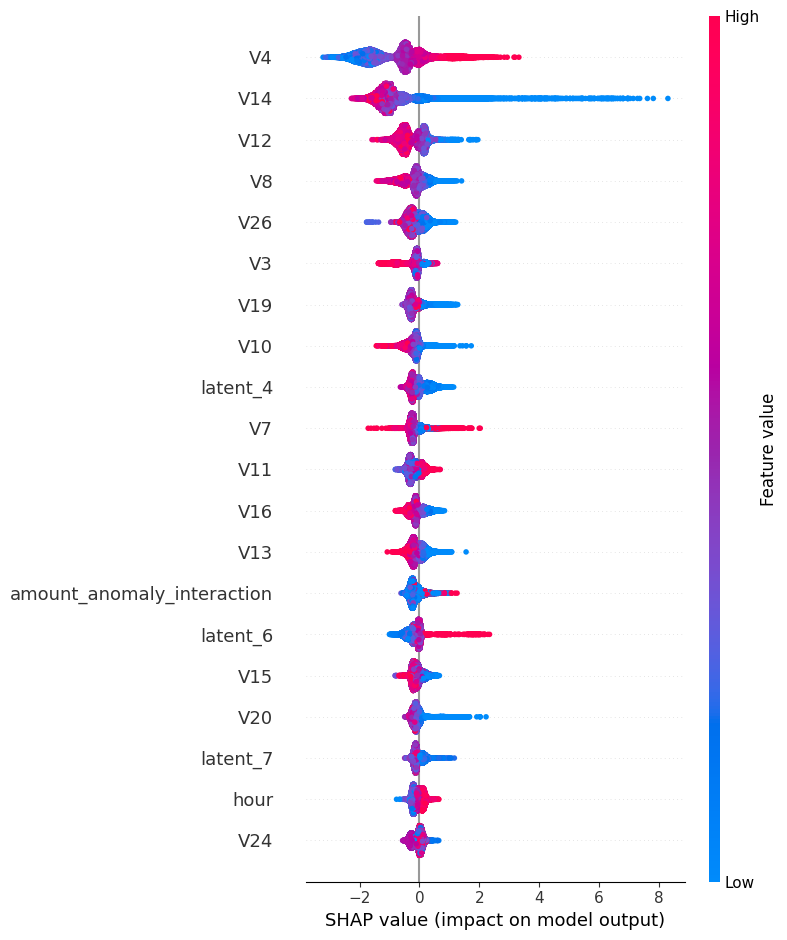

In [10]:
original_feature_names = X.columns.tolist()
latent_feature_names = [f"latent_{i}" for i in range(X_latent.shape[1])]  # Names for latent features
engineered_feature_names = original_feature_names + latent_feature_names

assert len(engineered_feature_names) == X_enriched.shape[1], "Feature names do not match the number of features in X_enriched"

explainer = shap.TreeExplainer(stacked_ensemble.named_estimators_['xgb'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=engineered_feature_names)


In [ ]:
# from https://gist.github.com/jonathanagustin/b67b97ef12c53a8dec27b343dca4abba
# install can take a minute

import os
# @title Convert Notebook to PDF. Save Notebook to given directory
NOTEBOOKS_DIR = "/content/drive/My Drive/CS 441/HW5" # @param {type:"string"}
NOTEBOOK_NAME = "CS441_HW5_Code.ipynb" # @param {type:"string"}
#------------------------------------------------------------------------------#
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
NOTEBOOK_PATH = f"{NOTEBOOKS_DIR}/{NOTEBOOK_NAME}"
assert os.path.exists(NOTEBOOK_PATH), f"NOTEBOOK NOT FOUND: {NOTEBOOK_PATH}"
!apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!jupyter nbconvert "$NOTEBOOK_PATH" --to pdf > /dev/null 2>&1
NOTEBOOK_PDF = NOTEBOOK_PATH.rsplit('.', 1)[0] + '.pdf'
assert os.path.exists(NOTEBOOK_PDF), f"ERROR MAKING PDF: {NOTEBOOK_PDF}"
print(f"PDF CREATED: {NOTEBOOK_PDF}")

Mounted at /content/drive/
PDF CREATED: /content/drive/My Drive/CS 441/HW5/CS441_HW5_Code.pdf


In [ ]:
!apt install pandoc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-luatex pandoc-citeproc context wkhtmltopdf librsvg2-bin groff ghc nodejs php python
  libjs-mathjax libjs-katex citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pandoc-